<a href="https://colab.research.google.com/github/dwikagt/P2P_byProfit/blob/main/1_New_Create_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Library

In [ ]:
!pip install -q hvplot
# install the Kaggle API client
! pip install -q kaggle

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from scipy import stats 
import hvplot.pandas
#Kaggle
from google.colab import files
import zipfile,os
#Preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
#Metric performa
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score, cross_val_predict
from scipy import stats
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier

pd.set_option('display.float', '{:.2f}'.format)
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)

# Load Data

In [ ]:
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"dwikaagt","key":"9557792337e4c4f134ed29bbfe845107"}'}

In [ ]:
#create directory
!mkdir -p ~/.kaggle 
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d wordsforthewise/lending-club

lending-club.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
local_zip = '/content/lending-club.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
df = pd.read_csv ("/tmp/accepted_2007_to_2018q4.csv/accepted_2007_to_2018Q4.csv")
df.head()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,...,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.00,3600.00,3600.00,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.00,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,...,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.00,24700.00,24700.00,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.00,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.06,...,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.00,20000.00,20000.00,60 months,10.78,432.66,B,B4,truck driver,10+ years,MORTGAGE,63000.00,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,home_improvement,NaN,605xx,IL,10.78,...,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.00,35000.00,35000.00,60 months,14.85,829.90,C,C5,Information Systems Officer,10+ years,MORTGAGE,110000.00,Source Verified,Dec-2015,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,076xx,NJ,17.06,...,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.00,10400.00,10400.00,60 months,22.45,289.91,F,F1,Contract Specialist,3 years,MORTGAGE,104433.00,Source Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,major_purchase,Major purchase,174xx,PA,25.37,...,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# The length of the data
print(f"The Length of the data: {df.shape}")

The Length of the data: (2260701, 151)


In [ ]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Data columns (total 151 columns):
 #    Column                                      Non-Null Count    Dtype  
---   ------                                      --------------    -----  
 0    id                                          2260701 non-null  object 
 1    member_id                                   0 non-null        float64
 2    loan_amnt                                   2260668 non-null  float64
 3    funded_amnt                                 2260668 non-null  float64
 4    funded_amnt_inv                             2260668 non-null  float64
 5    term                                        2260668 non-null  object 
 6    int_rate                                    2260668 non-null  float64
 7    installment                                 2260668 non-null  float64
 8    grade                                       2260668 non-null  object 
 9    sub_grade                                   

In [ ]:
df.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,...,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.00,2260668.00,2260668.00,2260668.00,2260668.00,2260668.00,2260664.00,2258957.00,2260639.00,2260668.00,2260668.00,2260638.00,1102166.00,359156.00,2260639.00,2260639.00,2260668.00,2258866.00,2260639.00,2260668.00,2260668.00,2260668.00,2260668.00,2260668.00,2260668.00,...,2210638.00,2210638.00,2190392.00,108020.00,108021.00,108021.00,108021.00,108021.00,108021.00,106184.00,108021.00,108021.00,108021.00,108021.00,35942.00,10917.00,10917.00,10917.00,10917.00,8651.00,10917.00,10917.00,34246.00,34246.00,34246.00
mean,NaN,15046.93,15041.66,15023.44,13.09,445.81,77992.43,18.82,0.31,698.59,702.59,0.58,34.54,72.31,11.61,0.20,16658.46,50.34,24.16,4206.89,4205.97,12082.56,12064.39,9505.77,2431.39,...,51022.94,23193.77,43732.01,33617.28,669.76,673.76,0.63,1.54,11.47,58.17,3.01,12.53,0.05,0.08,36.94,3.00,155.05,3.00,13.74,454.80,11636.88,193.99,5010.66,47.78,13.19
std,NaN,9190.25,9188.41,9192.33,4.83,267.17,112696.20,14.18,0.87,33.01,33.01,0.89,21.90,26.46,5.64,0.57,22948.31,24.71,11.99,7343.24,7342.33,9901.38,9896.99,8321.85,2679.74,...,49911.24,23006.56,45072.98,28153.87,44.73,44.73,0.99,1.76,6.63,25.55,3.28,8.15,0.41,0.41,23.92,0.00,129.04,0.00,9.67,375.39,7625.99,198.63,3693.12,7.31,8.16
min,NaN,500.00,500.00,0.00,5.31,4.93,0.00,-1.00,0.00,610.00,614.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,540.00,544.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,0.64,3.00,0.00,1.92,55.73,0.01,44.21,0.20,0.00
25%,NaN,8000.00,8000.00,8000.00,9.49,251.65,46000.00,11.89,0.00,675.00,679.00,0.00,16.00,55.00,8.00,0.00,5950.00,31.50,15.00,0.00,0.00,4546.46,4531.80,3000.00,728.19,...,20892.00,8300.00,15000.00,15106.75,645.00,649.00,0.00,0.00,7.00,39.80,1.00,7.00,0.00,0.00,16.00,3.00,59.44,3.00,5.00,175.23,5627.00,44.44,2208.00,45.00,6.00
50%,NaN,12900.00,12875.00,12800.00,12.62,377.99,65000.00,17.84,0.00,690.00,694.00,0.00,31.00,74.00,11.00,0.00,11324.00,50.30,22.00,0.00,0.00,9329.72,9309.67,7000.00,1525.94,...,37864.00,16300.00,32696.00,26516.50,670.00,674.00,0.00,1.00,10.00,60.20,2.00,11.00,0.00,0.00,36.00,3.00,119.14,3.00,15.00,352.77,10028.39,133.16,4146.11,45.00,14.00
75%,NaN,20000.00,20000.00,20000.00,15.99,593.32,93000.00,24.49,0.00,715.00,719.00,1.00,50.00,92.00,14.00,0.00,20246.00,69.40,31.00,6149.94,6146.31,16940.87,16916.71,13899.10,3108.06,...,64350.00,30300.00,58804.25,43769.00,695.00,699.00,1.00,2.00,15.00,78.60,4.00,17.00,0.00,0.00,56.00,3.00,213.26,3.00,22.00,620.17,16151.89,284.19,6850.17,50.00,18.00
max,NaN,40000.00,40000.00,40000.00,30.99,1719.83,110000000.00,999.00,58.00,845.00,850.00,33.00,226.00,129.00,101.00,86.00,2904836.00,892.30,176.00,40000.00,40000.00,63296.88,63296.88,40000.00,28192.50,...,3408095.00,1569000.00,2118996.00,1110019.00,845.00,850.00,6.00,27.00,82.00,434.30,43.00,106.00,21.00,23.00,185.00,3.00,943.94,3.00,37.00,2680.89,40306.41,1407.86,33601.00,521.35,181.00


# Create Profit as Target

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


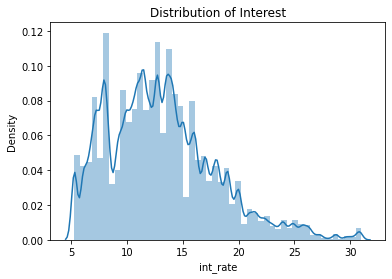

In [ ]:
plt.title("Distribution of Interest")
sns.distplot(df.int_rate);

In [ ]:
df["int_rate"].mean()

13.092829115111119

In [ ]:
conditions = [
    (df["grade"] == "A") & (df["int_rate"] >= 3.79),
    (df["grade"] == "B") & (df["int_rate"] >= 4.33),
    (df["grade"] == "C") & (df["int_rate"] >= 3.63),
    (df["grade"] == "D") & (df["int_rate"] >= 3.91),
    (df["grade"] == "E") & (df["int_rate"] >= 3.03),
    (df["grade"] == "F") & (df["int_rate"] >= 2.15),
    (df["grade"] == "G")
]

target = [1, 1, 1, 1, 1, 1, 0]
df['Profit_score'] = np.select(conditions, target)

df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,...,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,Profit_score
0,68407277,NaN,3600.00,3600.00,3600.00,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.00,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,...,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,1
1,68355089,NaN,24700.00,24700.00,24700.00,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.00,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.06,...,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,1
2,68341763,NaN,20000.00,20000.00,20000.00,60 months,10.78,432.66,B,B4,truck driver,10+ years,MORTGAGE,63000.00,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,home_improvement,NaN,605xx,IL,10.78,...,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,1
3,66310712,NaN,35000.00,35000.00,35000.00,60 months,14.85,829.90,C,C5,Information Systems Officer,10+ years,MORTGAGE,110000.00,Source Verified,Dec-2015,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,076xx,NJ,17.06,...,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,1
4,68476807,NaN,10400.00,10400.00,10400.00,60 months,22.45,289.91,F,F1,Contract Specialist,3 years,MORTGAGE,104433.00,Source Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,major_purchase,Major purchase,174xx,PA,25.37,...,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,1


In [ ]:
df['Profit_score'].value_counts()

1    2248500
0      12201
Name: Profit_score, dtype: int64

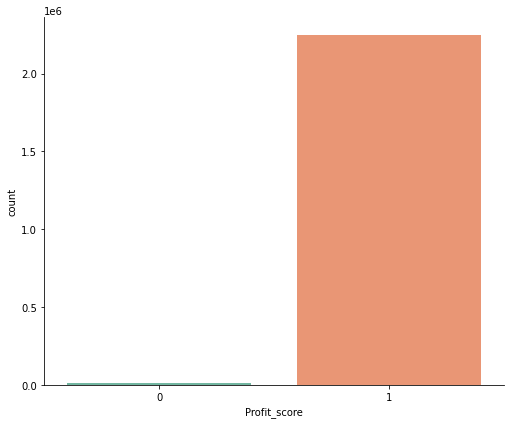

In [ ]:
sns.catplot(kind='count',x='Profit_score',height=6, aspect=1.2,data=df,palette='Set2')
plt.show()

# Dataset without loan_status

In [ ]:
#drop loan_status as late target
df.drop('loan_status', axis=1, inplace=True)

In [ ]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,...,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,Profit_score
0,68407277,NaN,3600.00,3600.00,3600.00,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.00,Not Verified,Dec-2015,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.00,...,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,1
1,68355089,NaN,24700.00,24700.00,24700.00,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.00,Not Verified,Dec-2015,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.06,1.00,...,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,1
2,68341763,NaN,20000.00,20000.00,20000.00,60 months,10.78,432.66,B,B4,truck driver,10+ years,MORTGAGE,63000.00,Not Verified,Dec-2015,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,home_improvement,NaN,605xx,IL,10.78,0.00,...,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,1
3,66310712,NaN,35000.00,35000.00,35000.00,60 months,14.85,829.90,C,C5,Information Systems Officer,10+ years,MORTGAGE,110000.00,Source Verified,Dec-2015,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,076xx,NJ,17.06,0.00,...,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,1
4,68476807,NaN,10400.00,10400.00,10400.00,60 months,22.45,289.91,F,F1,Contract Specialist,3 years,MORTGAGE,104433.00,Source Verified,Dec-2015,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,major_purchase,Major purchase,174xx,PA,25.37,1.00,...,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,1


In [ ]:
# The length of the data
print(f"The Length of the data: {df.shape}")

The Length of the data: (2260701, 151)


# Preprocessing Data

## Handling Missing Value

In [ ]:
# Sorted the number of missing values of features
missing_fractions = df.isnull().mean().round(3).sort_values(ascending=False)
missing_fractions

member_id                                    1.00
orig_projected_additional_accrued_interest   1.00
hardship_amount                              0.99
hardship_payoff_balance_amount               0.99
hardship_type                                0.99
                                             ... 
out_prncp                                    0.00
initial_list_status                          0.00
total_acc                                    0.00
revol_bal                                    0.00
Profit_score                                 0.00
Length: 151, dtype: float64

## Drop >30% missing value

In [ ]:
# Take drop feature list with >30% of missing values
drop_list = sorted(list(missing_fractions[missing_fractions > 0.3].index))
print('Drop_list len:',len(drop_list))
print(drop_list)

Drop_list len: 58
['all_util', 'annual_inc_joint', 'debt_settlement_flag_date', 'deferral_term', 'desc', 'dti_joint', 'hardship_amount', 'hardship_dpd', 'hardship_end_date', 'hardship_last_payment_amount', 'hardship_length', 'hardship_loan_status', 'hardship_payoff_balance_amount', 'hardship_reason', 'hardship_start_date', 'hardship_status', 'hardship_type', 'il_util', 'inq_fi', 'inq_last_12m', 'max_bal_bc', 'member_id', 'mths_since_last_delinq', 'mths_since_last_major_derog', 'mths_since_last_record', 'mths_since_rcnt_il', 'mths_since_recent_bc_dlq', 'mths_since_recent_revol_delinq', 'next_pymnt_d', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'open_rv_12m', 'open_rv_24m', 'orig_projected_additional_accrued_interest', 'payment_plan_start_date', 'revol_bal_joint', 'sec_app_chargeoff_within_12_mths', 'sec_app_collections_12_mths_ex_med', 'sec_app_earliest_cr_line', 'sec_app_fico_range_high', 'sec_app_fico_range_low', 'sec_app_inq_last_6mths', 'sec_app_mort_acc', 'sec_app_

In [ ]:
# Drop feature list with >30% of missing values
df.drop(labels=drop_list, axis=1, inplace=True)
df.shape

(2260701, 93)

After drop list missing value, we drop null row with dropna()

In [ ]:
df = df.dropna(axis=0, how="any")

In [ ]:
df.shape

(1652452, 93)

In [ ]:
print(sorted(df.columns))

['Profit_score', 'acc_now_delinq', 'acc_open_past_24mths', 'addr_state', 'annual_inc', 'application_type', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'collection_recovery_fee', 'collections_12_mths_ex_med', 'debt_settlement_flag', 'delinq_2yrs', 'delinq_amnt', 'disbursement_method', 'dti', 'earliest_cr_line', 'emp_length', 'emp_title', 'fico_range_high', 'fico_range_low', 'funded_amnt', 'funded_amnt_inv', 'grade', 'hardship_flag', 'home_ownership', 'id', 'initial_list_status', 'inq_last_6mths', 'installment', 'int_rate', 'issue_d', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'last_pymnt_amnt', 'last_pymnt_d', 'loan_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_inq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_s

## Drop Categorikal Feature

In [ ]:
# drop feature with unique to much
df[['id','emp_title','title','zip_code']].describe()

,id,emp_title,title,zip_code
count,1652452,1652452,1652452,1652452
unique,1652452,403738,31900,949
top,68407277,Teacher,Debt consolidation,750xx
freq,1,31512,881274,18677


In [ ]:
# Drop ['id','emp_title','title','zip_code'] bc much unique values
df.drop(labels=['id','emp_title','title','zip_code'], axis=1, inplace=True)

In [ ]:
df.shape

(1652452, 89)

In [ ]:
keep_list = ['charged_off','funded_amnt','addr_state', 'annual_inc', 'application_type', 'dti', 'earliest_cr_line', 'emp_length', 'emp_title', 'fico_range_high', 'fico_range_low', 'grade', 'home_ownership', 'id', 'initial_list_status', 'installment', 'int_rate', 'loan_amnt', 'Profit_score', 'mort_acc', 'open_acc', 'pub_rec', 'pub_rec_bankruptcies', 'purpose', 'revol_bal', 'revol_util', 'sub_grade', 'term', 'title', 'total_acc', 'verification_status', 'zip_code','last_pymnt_amnt','num_actv_rev_tl', 'mo_sin_rcnt_rev_tl_op','mo_sin_old_rev_tl_op',"bc_util","bc_open_to_buy","avg_cur_bal","acc_open_past_24mths" ]
len(keep_list)

40

In [ ]:
drop_list = [col for col in df.columns if col not in keep_list]

In [ ]:
df.drop(labels=drop_list, axis=1, inplace=True)
df.shape

(1652452, 35)

In [ ]:
df.isnull().mean().sort_values(ascending=False)

loan_amnt               0.00
avg_cur_bal             0.00
revol_util              0.00
total_acc               0.00
initial_list_status     0.00
last_pymnt_amnt         0.00
application_type        0.00
acc_open_past_24mths    0.00
bc_open_to_buy          0.00
pub_rec                 0.00
bc_util                 0.00
mo_sin_old_rev_tl_op    0.00
mo_sin_rcnt_rev_tl_op   0.00
mort_acc                0.00
num_actv_rev_tl         0.00
pub_rec_bankruptcies    0.00
revol_bal               0.00
open_acc                0.00
funded_amnt             0.00
home_ownership          0.00
term                    0.00
int_rate                0.00
installment             0.00
grade                   0.00
sub_grade               0.00
emp_length              0.00
annual_inc              0.00
fico_range_high         0.00
verification_status     0.00
purpose                 0.00
addr_state              0.00
dti                     0.00
earliest_cr_line        0.00
fico_range_low          0.00
Profit_score  

CLEAR MISSING VALUE!!

## Handling Categorical Data

In [ ]:
print([column for column in df.columns if df[column].dtype == object])

['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'purpose', 'addr_state', 'earliest_cr_line', 'initial_list_status', 'application_type']


##Term

In [ ]:
df.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

In [ ]:
term_values = {' 36 months': 36, ' 60 months': 60}
df['term'] = df.term.map(term_values)

In [ ]:
df.term.unique()

array([36, 60])

## Grade & Subgrade

In [ ]:
df['grade'].value_counts()

C    484916
B    479340
A    304235
D    240923
E    101701
F     31886
G      9451
Name: grade, dtype: int64

In [ ]:
print(f"GRADE unique: {df.grade.unique()}")
print(f"SUB_GRADE unique: {df.sub_grade.unique()}")

GRADE unique: ['C' 'F' 'B' 'A' 'E' 'D' 'G']
SUB_GRADE unique: ['C4' 'C1' 'F1' 'B2' 'B1' 'A2' 'B5' 'C2' 'E2' 'A4' 'C5' 'C3' 'A1' 'D4'
 'B4' 'D1' 'B3' 'D3' 'D2' 'D5' 'A5' 'F2' 'E3' 'E4' 'F5' 'E5' 'A3' 'G2'
 'E1' 'F3' 'G3' 'G4' 'G1' 'F4' 'G5']


In [ ]:
df.drop('grade', axis=1, inplace=True)

## emp_length

In [ ]:
df['emp_length'].value_counts()

10+ years    590897
2 years      160751
3 years      142292
< 1 year     138202
1 year       115287
5 years      108813
4 years      106950
6 years       80470
7 years       73222
8 years       72765
9 years       62803
Name: emp_length, dtype: int64

In [ ]:
for year in df.emp_length.unique():
    print(f"{year} years in this position:")
    print(f"{df[df.emp_length == year].Profit_score.value_counts(normalize=True)}")
    print('==========================================')

10+ years years in this position:
1   0.99
0   0.01
Name: Profit_score, dtype: float64
3 years years in this position:
1   0.99
0   0.01
Name: Profit_score, dtype: float64
6 years years in this position:
1   0.99
0   0.01
Name: Profit_score, dtype: float64
1 year years in this position:
1   0.99
0   0.01
Name: Profit_score, dtype: float64
7 years years in this position:
1   0.99
0   0.01
Name: Profit_score, dtype: float64
8 years years in this position:
1   0.99
0   0.01
Name: Profit_score, dtype: float64
5 years years in this position:
1   0.99
0   0.01
Name: Profit_score, dtype: float64
2 years years in this position:
1   0.99
0   0.01
Name: Profit_score, dtype: float64
9 years years in this position:
1   0.99
0   0.01
Name: Profit_score, dtype: float64
< 1 year years in this position:
1   0.99
0   0.01
Name: Profit_score, dtype: float64
4 years years in this position:
1   0.99
0   0.01
Name: Profit_score, dtype: float64


In [ ]:
df.drop('emp_length', axis=1, inplace=True)

In [ ]:
df['home_ownership'].value_counts()

MORTGAGE    851022
RENT        628352
OWN         172410
ANY            602
OTHER           35
NONE            31
Name: home_ownership, dtype: int64

In [ ]:
df.loc[(df.home_ownership == 'ANY') | (df.home_ownership == 'NONE'), 'home_ownership'] = 'OTHER'  
df.home_ownership.value_counts()

MORTGAGE    851022
RENT        628352
OWN         172410
OTHER          668
Name: home_ownership, dtype: int64

In [ ]:
df.loc[df['home_ownership']=='OTHER', 'Profit_score'].value_counts()

1    663
0      5
Name: Profit_score, dtype: int64

## verification_status

In [ ]:
df.verification_status.unique()

array(['Not Verified', 'Source Verified', 'Verified'], dtype=object)

In [ ]:
df['verification_status'].value_counts()

Source Verified    697982
Not Verified       535740
Verified           418730
Name: verification_status, dtype: int64

## purpose

In [ ]:
df.purpose.unique()

array(['debt_consolidation', 'small_business', 'major_purchase',
       'credit_card', 'home_improvement', 'house', 'other', 'car',
       'medical', 'vacation', 'moving', 'renewable_energy', 'wedding',
       'educational'], dtype=object)

In [ ]:
df['verification_status'].value_counts()

Source Verified    697982
Not Verified       535740
Verified           418730
Name: verification_status, dtype: int64

## addr_state

In [ ]:
df['addr_state'].value_counts()

CA    223238
TX    142740
NY    125879
FL    116093
IL     70295
       ...  
DC      3572
SD      3410
ID      3018
ND      2701
IA         1
Name: addr_state, Length: 51, dtype: int64

In [ ]:
df.purpose.unique()

array(['debt_consolidation', 'small_business', 'major_purchase',
       'credit_card', 'home_improvement', 'house', 'other', 'car',
       'medical', 'vacation', 'moving', 'renewable_energy', 'wedding',
       'educational'], dtype=object)

In [ ]:
df.drop('addr_state', axis=1, inplace=True)

## earliest_cr_line

In [ ]:
df.earliest_cr_line.unique()

array(['Aug-2003', 'Dec-1999', 'Jun-1998', 'Jun-1990', 'Feb-1999',
       'Apr-2002', 'Nov-1994', 'Apr-1995', 'Feb-1988', 'Jun-2005',
       'Jun-1996', 'Dec-2001', 'Nov-1993', 'Sep-2001', 'May-2004',
       'Jun-1991', 'May-2000', 'Oct-2011', 'May-1994', 'Jul-2011',
       'May-1991', 'May-2001', 'Jun-2002', 'Dec-1985', 'Feb-2002',
       'Jun-2001', 'Jun-1997', 'Oct-1996', 'Jan-2005', 'Aug-2004',
       'Jun-2007', 'Jul-2004', 'Apr-2001', 'Oct-2004', 'May-1992',
       'Jul-2001', 'Oct-1999', 'Nov-2001', 'Jan-2001', 'Sep-2004',
       'Nov-2005', 'Feb-1989', 'Sep-2006', 'Oct-2002', 'Feb-1990',
       'Aug-1987', 'Oct-1998', 'Aug-2001', 'Feb-2004', 'Mar-2002',
       'Nov-1999', 'Jan-1999', 'Jun-2000', 'Jan-2007', 'Dec-1998',
       'Aug-1997', 'Apr-1990', 'Jun-2004', 'Jun-1995', 'Dec-2002',
       'Aug-1986', 'Nov-2002', 'Sep-2000', 'Feb-2012', 'Apr-2005',
       'Sep-1994', 'Sep-2007', 'Jan-1998', 'May-2008', 'Mar-2001',
       'Apr-1994', 'Apr-2003', 'Jan-2011', 'Nov-2000', 'Sep-20

In [ ]:
df.drop('earliest_cr_line', axis=1, inplace=True)

## initial_status

In [ ]:
df.initial_list_status.unique()

array(['w', 'f'], dtype=object)

## application_type

In [ ]:
df.application_type.unique()

array(['Individual', 'Joint App'], dtype=object)

# Dummy Encoding

In [ ]:
dummies = ['sub_grade', 'verification_status', 'purpose', 'initial_list_status', 
           'application_type', 'home_ownership']
df = pd.get_dummies(df, columns=dummies, drop_first=True)

# Explore Data

In [ ]:
df.shape

(1652452, 79)

In [ ]:
df.describe()

,loan_amnt,funded_amnt,term,int_rate,installment,annual_inc,dti,fico_range_low,fico_range_high,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_pymnt_amnt,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mort_acc,num_actv_rev_tl,pub_rec_bankruptcies,Profit_score,...,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w,application_type_Joint App,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
count,1652452.00,1652452.00,1652452.00,1652452.00,1652452.00,1652452.00,1652452.00,1652452.00,1652452.00,1652452.00,1652452.00,1652452.00,1652452.00,1652452.00,1652452.00,1652452.00,1652452.00,1652452.00,1652452.00,1652452.00,1652452.00,1652452.00,1652452.00,1652452.00,1652452.00,...,1652452.00,1652452.00,1652452.00,1652452.00,1652452.00,1652452.00,1652452.00,1652452.00,1652452.00,1652452.00,1652452.00,1652452.00,1652452.00,1652452.00,1652452.00,1652452.00,1652452.00,1652452.00,1652452.00,1652452.00,1652452.00,1652452.00,1652452.00,1652452.00,1652452.00
mean,15400.56,15400.55,43.23,13.21,455.32,81551.62,19.07,697.83,701.83,12.20,0.21,16635.44,49.54,25.34,3662.24,4.90,14017.78,11800.43,57.14,176.03,12.73,1.62,5.66,0.13,0.99,...,0.00,0.00,0.00,0.00,0.00,0.42,0.25,0.23,0.57,0.00,0.07,0.01,0.02,0.01,0.01,0.06,0.00,0.01,0.01,0.00,0.70,0.05,0.00,0.10,0.38
std,9234.00,9234.00,11.01,4.86,268.43,116003.27,11.39,32.34,32.34,5.70,0.59,21961.54,24.22,12.07,6242.97,3.16,16126.84,16952.54,28.45,91.93,15.50,1.93,3.28,0.37,0.08,...,0.04,0.04,0.03,0.03,0.03,0.49,0.43,0.42,0.49,0.00,0.25,0.08,0.15,0.11,0.08,0.24,0.02,0.10,0.08,0.02,0.46,0.22,0.02,0.31,0.49
min,1000.00,1000.00,36.00,5.31,4.93,0.00,-1.00,660.00,664.00,1.00,0.00,0.00,0.00,3.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,8000.00,8000.00,36.00,9.71,260.25,50000.00,12.43,675.00,679.00,8.00,0.00,6140.00,31.10,17.00,322.00,3.00,3388.00,1750.00,34.70,115.00,4.00,0.00,3.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,13725.00,13725.00,36.00,12.69,388.07,70000.00,18.22,690.00,694.00,11.00,0.00,11520.00,49.30,24.00,630.99,4.00,8148.00,5740.00,59.10,160.00,8.00,1.00,5.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
75%,20000.00,20000.00,60.00,16.01,605.11,97000.00,24.74,715.00,719.00,15.00,0.00,20403.00,68.00,32.00,4330.42,6.00,19544.00,14906.00,82.10,224.00,16.00,3.00,7.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00
max,40000.00,40000.00,60.00,30.99,1719.83,110000000.00,999.00,845.00,850.00,101.00,86.00,2568995.00,366.60,176.00,42192.05,64.00,623229.00,711140.00,339.60,852.00,406.00,94.00,59.00,12.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


The remaining 1652452 row data, after the drop of the row value is Null